# 양자 회로 실습

Qiskit Textbook의 Scratch Pad에 이 코드들을 Copy and Paste 해서 실행해 보세요 :)

## Part I : Circuit

텍스트북의 다음의 예제 회로를 만들고 이 회로의 Unitary Matrix을 구해 봅시다

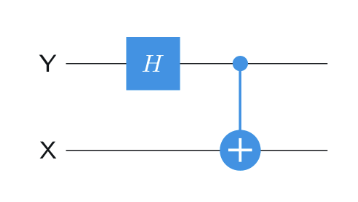

In [1]:
#필요한 라이브러리들 부르기 
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_aer.backends import UnitarySimulator
from qiskit.quantum_info import Operator
from qiskit.visualization.array import array_to_latex

우선, 2큐비트 회로를 만들고 X와 Y로 이름을 붙여봅시다

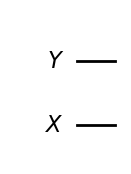

In [25]:
#방법 1 - Quantum info 라이브러리 사용하기

X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(Y, X)

circuit.draw("mpl")

0번 큐비트에 하다마드 게이트를 적용하고 회로의 유니터리를 출력해 봅시다.

In [26]:
circuit.h(Y)
array_to_latex(Operator(circuit))

<IPython.core.display.Latex object>

0번 큐비트를 컨트롤 큐비트로, 1번 큐비트를 타겟 큐비트로 하는 CX 게이트를 적용하고 회로의 유니터리를 출력해 봅시다.

In [27]:
circuit.cx(Y,X)
array_to_latex(Operator(circuit))

<IPython.core.display.Latex object>

In [34]:
#방법 2 - Unitary simulator 사용하기

backend = UnitarySimulator()
result = backend.run(circuit).result().get_unitary()
array_to_latex(result)

<IPython.core.display.Latex object>

이 유니터리에 |00>, |01>, |10>, |11> 을 넣은 후 결과를 확인해 봅시다.

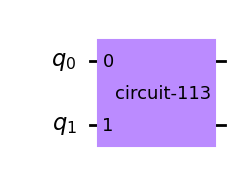

In [40]:
#00#
qc_00 = QuantumCircuit(2)
qc_00.append(circuit,[0,1])
qc_00.draw('mpl')

In [41]:
from qiskit.quantum_info import Statevector

array_to_latex(Statevector(qc))

<IPython.core.display.Latex object>

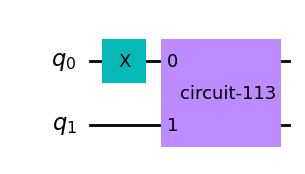

In [47]:
#01#
qc_01 = QuantumCircuit(2)
qc_01.x(0)
qc_01.append(circuit,[0,1])
qc_01.draw('mpl')

In [48]:
array_to_latex(Statevector(qc_01))

<IPython.core.display.Latex object>

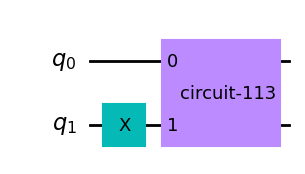

In [49]:
#10#
qc_10 = QuantumCircuit(2)
qc_10.x(1)
qc_10.append(circuit,[0,1])
qc_10.draw('mpl')

In [50]:
array_to_latex(Statevector(qc_10))

<IPython.core.display.Latex object>

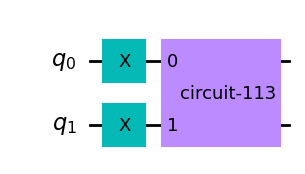

In [51]:
#11#
qc_11 = QuantumCircuit(2)
qc_11.x([0,1])
qc_11.append(circuit,[0,1])
qc_11.draw('mpl')

In [53]:
array_to_latex(-Statevector(qc_11))

<IPython.core.display.Latex object>

아래에서는 임의의 3큐비트 유니터리 행렬을 만들고 그 행렬을 회로에 적용하고 그리는 것을 실습해 보도록 하겠습니다.
텍스트북과 같이 U로 큰 블럭이 생성되는 것을 확인해 보실 수 있습니다.

In [60]:
# Get some random unitary:
from qiskit.quantum_info import random_unitary
num_qubits = 3
U = random_unitary(2 ** num_qubits)
array_to_latex(U)
# Create the quantum circuit:


<IPython.core.display.Latex object>

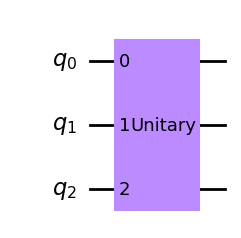

In [61]:
qr = QuantumRegister(num_qubits, 'q')
circ = QuantumCircuit(qr)
circ.unitary(U, qr)
circ.draw('mpl')

## Part II : Inner products, orthonormality, and projections

### 내적

아래의 코딩 블럭에서 임의의 ket 벡터 $|\alpha\rangle$를 생성하고 이 벡터를 사용해 텍스트북의 내적의 성질들을 확인해 보도록 하겠습니다.

In [107]:
import numpy as np

A = np.array([[1 + 3j], [2 - 1j], [4 - 2j]]) 
array_to_latex(A)


<IPython.core.display.Latex object>

### norm

다음의 코드 블럭을 사용해 
$$\langle \alpha | \alpha \rangle = || |\alpha\rangle ||^2$$ 
을 확인해 보도록 하겠습니다.

In [108]:
#<a|
A_conj = np.conjugate(A)
A_dagger = np.transpose(A_conj)
array_to_latex(A_dagger)


<IPython.core.display.Latex object>

In [109]:
np.matmul(A_dagger, A)

array([[35.+0.j]])

In [110]:
## compare || |a> ||^2
from numpy import linalg as LA

print("norm of A = %f" % LA.norm(A))
print("norm of A^2 = %f" % LA.norm(A)**2)

norm of A = 5.916080
norm of A^2 = 35.000000


### Conjugate symmetry

다음의 코드블럭을 사용해 공액 대칭성을 확인해 보도록 하겠습니다.
$$\overline{\langle \psi | \phi \rangle} = \langle \phi | \psi \rangle $$

In [119]:
B = np.array([[2 - 2j], [1 - 1j], [3 + 1j]]) 
B_conj = np.conjugate(B)
B_dagger = np.transpose(B_conj)

array_to_latex(np.conjugate(np.matmul(A_dagger, B)))


<IPython.core.display.Latex object>

In [118]:
array_to_latex(np.matmul(B_dagger, A))


<IPython.core.display.Latex object>

### Linearity in the second argument

다음으로는 내적의 선형성에 대해 알아보도록 하겠습니다. 다음의 내용을 아래의 코드로 확인해 봅시다.
$$|\phi \rangle = \alpha_1 |\phi_1 \rangle + \alpha_2 |\phi_2 \rangle$$
$$\langle \psi | \phi \rangle = \alpha_1 \langle \psi|\phi_1 \rangle + \alpha_2 \langle \psi|\phi_2 \rangle$$

In [122]:
A1 = np.array([[1], [0], [0]]) 
A2 = np.array([[0], [1], [0]]) 
A3 = np.array([[0], [0], [1]]) 
a1 = 1 + 3j
a2 = 2 - 1j
a3 = 4 - 2j

array_to_latex (a1 * np.matmul(B_dagger, A1) + a2 * np.matmul(B_dagger, A2) + a3 * np.matmul(B_dagger, A3))

<IPython.core.display.Latex object>

### The Cauchy–Schwarz inequality

다음의 코드에서는 코시-슈바르츠 부등식을 확인해 보도록 하겠습니다.
$$|\langle \psi | \phi \rangle | \leq || |\psi\rangle || || |\phi\rangle ||$$

In [124]:
np.abs(9 - 1j)

9.055385138137417

In [125]:
LA.norm(B)*LA.norm(A)

26.45751311064591

## Orthogonal and orthonormal sets (직교와 정규직교세트)

### 직교
두벡터가 직교한다는 것은 $\langle \alpha | \beta \rangle = 0$을 의미합니다.
큐비트의 두 계산기저 $|0\rangle$와 $|1\rangle$을 사용해 두 벡터가 직교함을 확인해 봅시다.

In [129]:
ket_0 = [[1],[0]]
ket_1 = [[0],[1]]
np.matmul(np.transpose(ket_0), ket_1)

array([[0]])

정규직교세트란 서로 직교하는 단위벡터들의 집합을 의미합니다. 따라서 서로 직교하는 조건 외에도 크기가 1인 단위벡터이면서 다음의 조건을 만족해야 합니다. 큐비트의 두 계산 기저를 사용해 정규직교세트임을 확인해 보겠습니다.
$$if j = k, \langle \psi_j | \psi_k \rangle = 1$$
$$if j \neq k, \langle \psi_j | \psi_k \rangle = 0$$

In [133]:
print("norm of |0> = %f" %LA.norm(ket_0))
print("norm of |1> = %f" %LA.norm(ket_1))

print("<0|0> = %f" % np.matmul(np.transpose(ket_0), ket_0))
print("<0|1> = %f" % np.matmul(np.transpose(ket_0), ket_1))
print("<1|0> = %f" % np.matmul(np.transpose(ket_1), ket_0))
print("<1|1> = %f" % np.matmul(np.transpose(ket_1), ket_1))

norm of |0> = 1.000000
norm of |1> = 1.000000
<0|0> = 1.000000
<0|1> = 0.000000
<1|0> = 0.000000
<1|1> = 1.000000


### 정규직교세트와 유니터리 행렬들 (Orthonormal sets and unitary matrices)

유니터리 행렬의 경우 다음의 조건들을 만족한다고 알려져 있습니다.
1. 행렬의 행들은 정규직교세트를 구성한다
2. 행렬의 열들은 정규직교세트를 구성한다. 

임의의 유니터리 행렬을 생성하여 위의 내용을 확인해 보도록 하겠습니다.


In [134]:
from qiskit.quantum_info import random_unitary
num_qubits = 1
U = random_unitary(2 ** num_qubits)
array_to_latex(U)

<IPython.core.display.Latex object>

In [139]:
#행 점검
row1 = U.data[0,:]
print(row1)
row2 = U.data[1,:]
print(row2)

[-0.21038266-0.68623172j  0.32284167+0.61692659j]
[0.47221614-0.51170018j 0.38165847-0.6078747j ]


In [147]:
print("norm of |0> = %f" %LA.norm(row1))
print("norm of |1> = %f" %LA.norm(row2))
print(f'<row1|row1> = {np.matmul(np.conjugate(np.transpose(row1)), row1):.2f}')
print(f'<row1|row2> = {np.matmul(np.conjugate(np.transpose(row1)), row2):.2f}')
print(f'<row2|row1> = {np.matmul(np.conjugate(np.transpose(row2)), row1):.2f}')
print(f'<row2|row2> = {np.matmul(np.conjugate(np.transpose(row2)), row2):.2f}')


norm of |0> = 1.000000
norm of |1> = 1.000000
<row1|row1> = 1.00+0.00j
<row1|row2> = -0.00-0.00j
<row2|row1> = -0.00+0.00j
<row2|row2> = 1.00+0.00j


In [153]:
#열 점검
col1 = U.data[:,0]
print(col1)
col2 = U.data[:,1]
print(col2)

[-0.21038266-0.68623172j  0.47221614-0.51170018j]
[0.32284167+0.61692659j 0.38165847-0.6078747j ]


In [150]:
print("norm of |col1> = %f" %LA.norm(col1))
print("norm of |col2> = %f" %LA.norm(col2))
print(f'<col1|col1> = {np.matmul(np.conjugate(np.transpose(col1)), col1):.2f}')
print(f'<col1|col2> = {np.matmul(np.conjugate(np.transpose(col1)), col2):.2f}')
print(f'<col2|col1> = {np.matmul(np.conjugate(np.transpose(col2)), col1):.2f}')
print(f'<col2|col2> = {np.matmul(np.conjugate(np.transpose(col2)), col2):.2f}')


norm of |col1> = 1.000000
norm of |col2> = 1.000000
<col1|col1> = 1.00+0.00j
<col1|col2> = 0.00-0.00j
<col2|col1> = 0.00+0.00j
<col2|col2> = 1.00+0.00j


## 투영과 투영 측정 (Projections and projective measurements)

### 투영/투영 행렬

정사각형 행렬 $\Pi$는 다음 두 가지 특성을 충족 하는 경우 투영행렬이라고 합니다.
1. $\Pi = \Pi^\dagger$
2. $\Pi^2 = \Pi$

1의 경우를 만족하는 행렬들을 에르미트 행렬이라 부르며 2의 경우를 만족하는 행렬들을 멱등행렬이라 부릅니다. 

일반적으로 임의의 단위 벡터 $| \psi \rangle$이 있을때, 다음의 행렬은 투영행렬이됩니다.
$$|\psi \rangle \langle \psi |$$

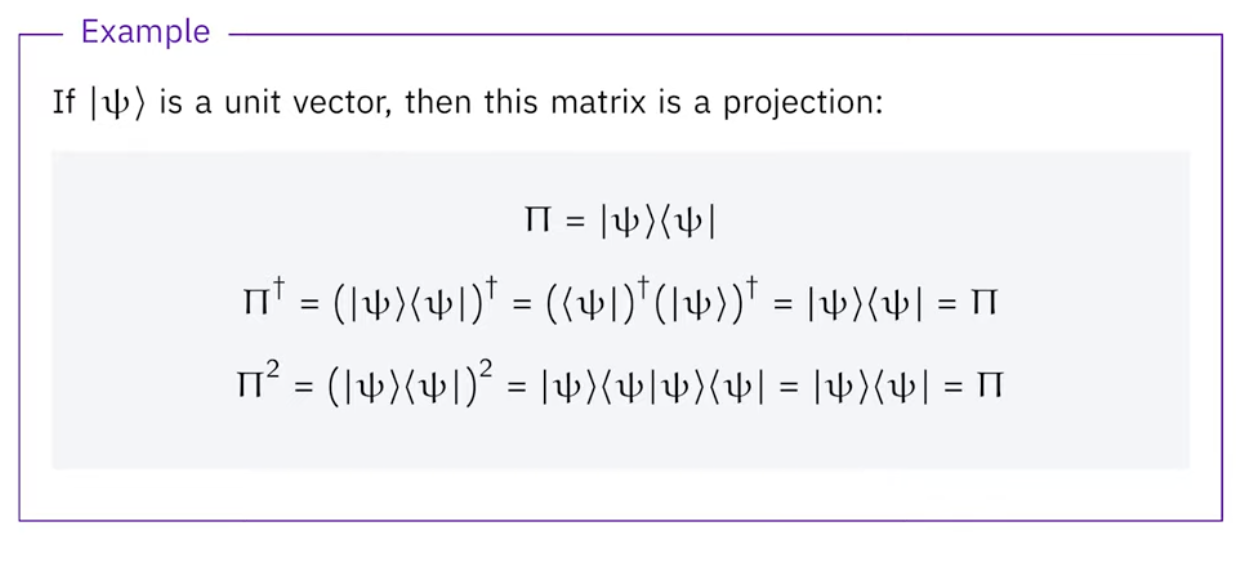

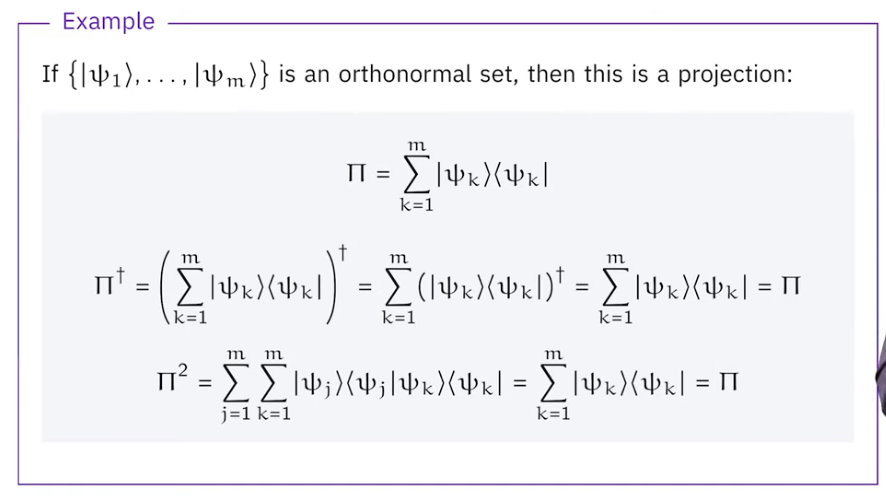

### 투영 측정

투영 측정 은 합계가 항등 행렬과 동일한 투영 모음으로 설명되는 측정입니다.
$$\Pi_1 + ... + \Pi_m = \mathbb{1}$$

시스템의 $|\psi\rangle$에 측정 중 하나(랜덤하게, 여기에서는 1부터 m사이 임의의 $\kappa$ )이 가해지면 두가지 일이 발생합니다.
1. $Pr(outcome = \kappa) = ||\Pi_\kappa |\psi \rangle||^2 = \langle \psi | \Pi_\kappa | \psi \rangle $
2. 시스템의 상태는 다음으로 붕괴합니다.
$$ \frac{\Pi_\kappa |\psi \rangle}{|| \Pi_\kappa |\psi \rangle ||}$$

아래의 코드에서 중첩상태의 양자상태를 |0>의 기저로 측정하는 경우를 살펴보도록 하겠습니다.

In [167]:
from qiskit.quantum_info import random_statevector

vec = random_statevector(2)
array_to_latex(vec)


<IPython.core.display.Latex object>

이 행렬이 각각 0와 1로 측정될 확률은 다음과 같습니다.


In [180]:
Pi_0 = np.matmul(ket_0, np.transpose(ket_0))
Pi_1 = np.matmul(ket_1, np.transpose(ket_1))
print(f'0으로 측정될 확률 = {LA.norm(np.matmul(Pi_0, vec))**2:.2f}')
print(f'1로 측정될 확률 = {LA.norm(np.matmul(Pi_1, vec))**2:.2f}')

0으로 측정될 확률 = 0.39
1로 측정될 확률 = 0.61


시스템이 1로 측정된 이후 시스템의 상태는 다음과 같이 계산할 수 있습니다.

In [182]:
array_to_latex(np.matmul(Pi_1, vec) / LA.norm(np.matmul(Pi_1, vec)))

<IPython.core.display.Latex object>

In [181]:
np.abs(np.matmul(Pi_1, vec)[1] / LA.norm(np.matmul(Pi_1, vec)))

1.0

모든 투영 측정은 유니터리연산과 표준 계산 기저 측정으로 구현할 수 있습니다. 

## Part III: 양자정보의 제한

### 글로벌 위상의 무관계성 (Irrevance of Global Phase)

글로벌 위상은 측정 확률이나 결과에 영향을 미치지 않습니다.  또한 글로벌 위상만큼의 차이를 지니는 두 상태, 예를 들어 $|\psi \rangle$ 과 $-|\psi \rangle$에 유니터리 연산을 적용하더라도 그 결과의 측정 값이나 측정 확률에 차이는 없습니다.

따라서 글로벌 위상의 차이만을 갖는 두 상태는, 표준기저를 통한 측정이나, 일반적인 투영 측정의 관점에서 동일하다, 구분 불가능하다 내지는 하나의 양자상태의 다른 표기법 등으로 생각할 수 있습니다.

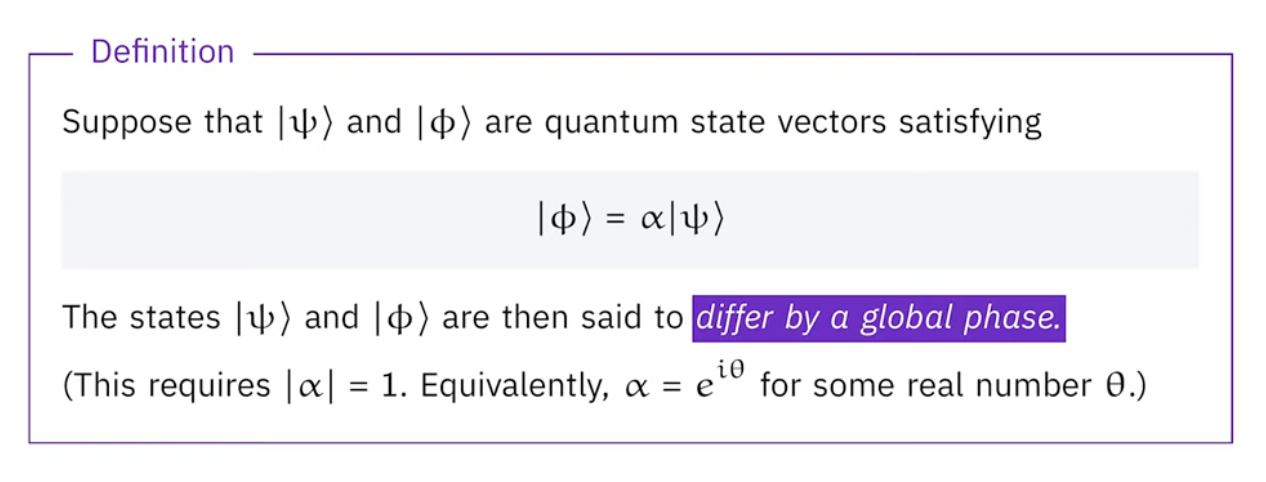


### No cloning theorem

양자 상태의 복제는 선형 연산이 아니고 유니터리는 선형 연산이기 때문에 불가능합니다.

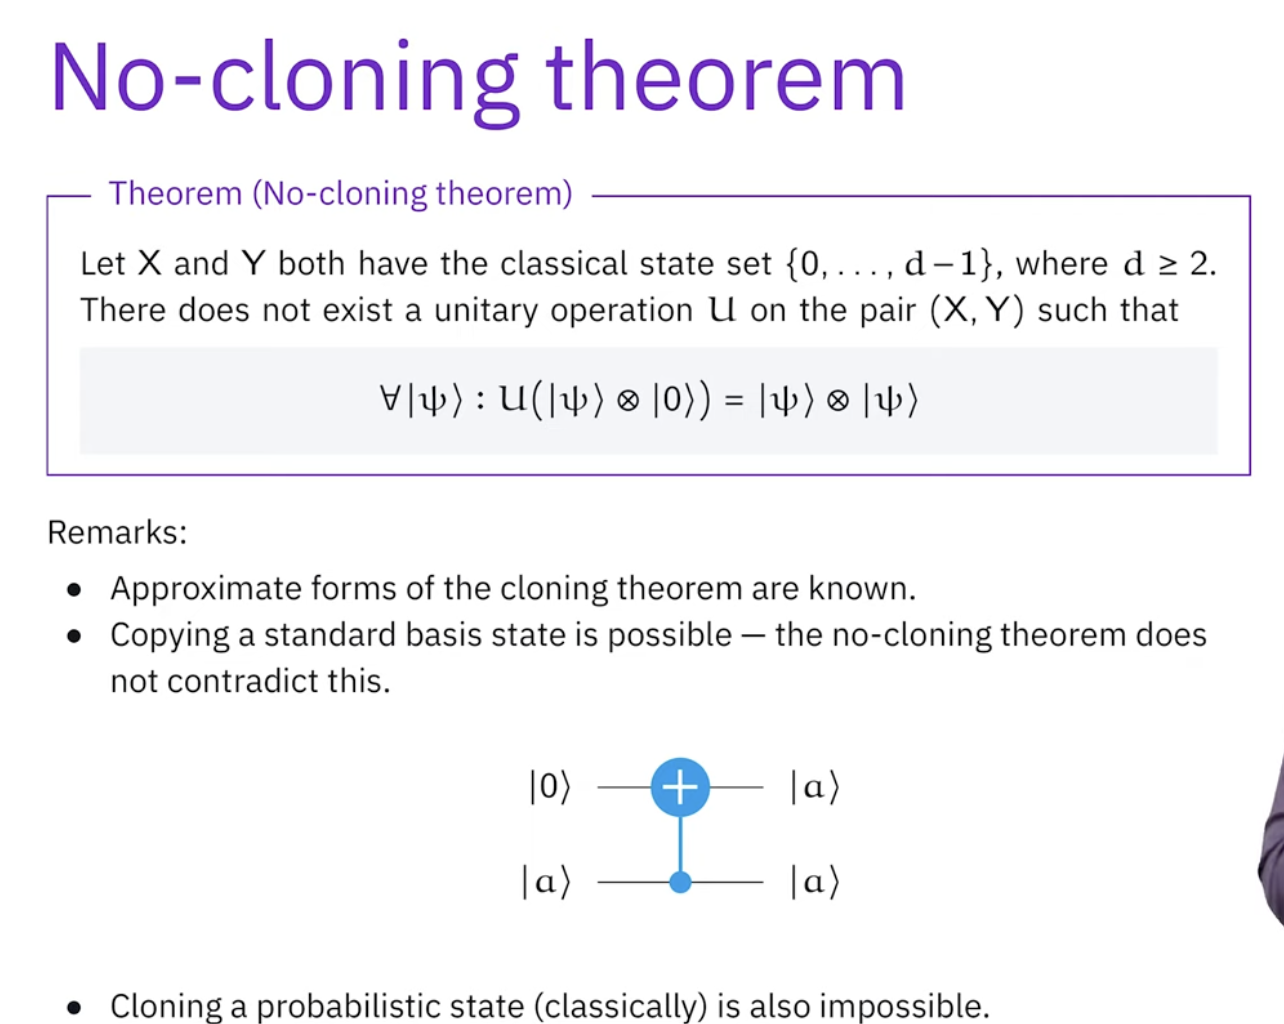

In [183]:
import qiskit.tools.jupyter
%qiskit_version_table